In [1]:
import numpy as np # linear algebra
import dask.array as da
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import sys

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
# First of all, let's see which files we have:


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




In [3]:
df_train = pd.read_parquet("train.parquet")


In [4]:
# The "S_2" column seems as the date column. Let's change its type to datetime:

df_train["S_2"] = pd.to_datetime(df_train["S_2"])
df_train = df_train.drop(['S_2'],axis = 1)

In [5]:
df_train

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,0.025139,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.001498,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,0.023691,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.008225,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.983019,15,0.013151,0.815422,0.003457,0.100503,0.0,0.012343,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006773,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.969861,15,0.009855,1.003541,0.005117,0.101802,0.0,0.008578,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.001168,0


# MAJOR GROUPBY (DATA REDUCED BY 12 TIMES)

In [6]:
df_train = df_train.groupby(["customer_ID"]).tail(1).set_index("customer_ID")


In [7]:
df_train

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,NaN,...,-1,-1,-1,0,0,0.000000,NaN,0,0.002970,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,NaN,0.060646,...,-1,-1,-1,0,0,0.000000,NaN,0,0.003169,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880875,0,0.004284,0.812649,0.006450,NaN,0.0,0.007196,NaN,NaN,...,-1,-1,-1,0,0,0.000000,NaN,0,0.000834,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621776,0,0.012564,1.006183,0.007829,0.287766,0.0,0.009937,NaN,0.046104,...,-1,-1,-1,0,0,0.000000,NaN,0,0.005560,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.871900,0,0.007679,0.815746,0.001247,NaN,0.0,0.005528,NaN,0.044671,...,-1,-1,-1,0,0,0.000000,NaN,0,0.006944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.844229,15,0.028515,1.009866,0.001928,0.128707,0.0,0.005893,NaN,0.113053,...,-1,-1,-1,0,0,0.000000,NaN,0,0.003009,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.831279,1,0.292360,0.055656,0.006953,NaN,0.0,0.233078,NaN,0.134540,...,-1,-1,-1,0,0,0.000000,NaN,0,0.009230,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.800522,9,0.020563,1.007023,0.000957,0.066648,0.0,0.006314,NaN,0.049778,...,-1,-1,-1,0,0,0.000000,NaN,0,0.000340,0


In [8]:

df_train_labels = pd.read_csv("train_labels.csv")
df_train_labels["target"] = df_train_labels["target"].astype("int8")

In [9]:
df_train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [10]:
df_train = df_train.merge(df_train_labels, on="customer_ID", how='left')


In [11]:
#del df_train_labels
gc.collect()

21

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 190 entries, customer_ID to target
dtypes: float32(93), int16(9), int8(87), object(1)
memory usage: 215.8+ MB


In [13]:
tmp = df_train.isna().sum().mul(100).div(len(df_train)).sort_values(ascending=False)

tmp

D_88      99.819792
D_110     99.198541
B_39      99.105495
D_73      99.076296
B_42      98.661620
            ...    
D_78       0.000000
D_79       0.000000
R_8        0.000000
R_9        0.000000
target     0.000000
Length: 190, dtype: float64

In [14]:
missingDF = pd.DataFrame(tmp).reset_index()
drop_cols = missingDF[missingDF[0]>75]["index"].values
print(drop_cols)

['D_88' 'D_110' 'B_39' 'D_73' 'B_42' 'D_134' 'B_29' 'D_76' 'D_132' 'D_42'
 'D_142']


In [15]:
df_train.drop(columns = drop_cols,axis=1, inplace=True)
df_train.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,...,-1,-1,-1,0,0,0.0,0,0.002970,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,0.060646,...,-1,-1,-1,0,0,0.0,0,0.003169,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0,0.004284,0.812649,0.006450,NaN,0.0,0.007196,NaN,...,-1,-1,-1,0,0,0.0,0,0.000834,0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0,0.012564,1.006183,0.007829,0.287766,0.0,0.009937,0.046104,...,-1,-1,-1,0,0,0.0,0,0.005560,0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.871900,0,0.007679,0.815746,0.001247,NaN,0.0,0.005528,0.044671,...,-1,-1,-1,0,0,0.0,0,0.006944,0,0


In [16]:
df_train.shape
# For categorical columns
cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
cols

Index(['customer_ID', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3',
       'D_43',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=179)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 179 entries, customer_ID to target
dtypes: float32(82), int16(9), int8(87), object(1)
memory usage: 196.5+ MB


In [18]:
df_train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,target
count,455944.000000,458913.000000,458913.000000,4.588820e+05,4.589130e+05,373943.000000,458882.000000,4.588820e+05,324591.000000,458913.000000,...,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,456083.000000,458913.000000,4.589130e+05,458913.000000,458913.000000
mean,0.635249,6.680637,0.139027,5.916128e-01,1.073958e-01,0.229064,0.095312,1.548291e-01,0.163768,0.968495,...,-0.929703,-0.963947,-0.953272,0.168845,0.023935,0.162466,0.168747,5.201584e-02,0.636635,0.258934
std,0.267547,13.672650,0.231266,4.121456e-01,2.786386e-01,0.198845,0.305360,2.550615e-01,0.227059,1.979220,...,0.398790,0.188166,0.262052,0.390730,0.152846,0.352060,0.390647,1.820323e-01,2.164931,0.438050
min,-0.458955,0.000000,-3.571172,2.024839e-07,5.646122e-08,-0.508883,0.000000,7.574315e-08,0.000002,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,1.995319e-08,-1.000000,0.000000
25%,0.449332,0.000000,0.008984,7.091162e-02,2.957326e-03,0.127512,0.000000,5.483745e-03,0.043333,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.757897e-03,0.000000,0.000000
50%,0.682559,0.000000,0.033219,8.134054e-01,5.920879e-03,0.164910,0.000000,1.082996e-02,0.092436,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,5.501410e-03,0.000000,0.000000
75%,0.862186,9.000000,0.153634,1.001956e+00,8.891468e-03,0.264784,0.000000,2.106605e-01,0.195026,1.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,8.251762e-03,0.000000,1.000000
max,1.009998,170.000000,1.324059,1.010000e+00,2.759738e+00,3.993525,8.988807,1.596532e+00,9.185312,32.000000,...,7.000000,1.000000,5.000000,1.000000,1.000000,1.339910,1.000000,1.343326e+00,53.000000,1.000000


In [19]:
df_train

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,...,-1,-1,-1,0,0,0.000000,0,0.002970,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,0.060646,...,-1,-1,-1,0,0,0.000000,0,0.003169,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0,0.004284,0.812649,0.006450,NaN,0.0,0.007196,NaN,...,-1,-1,-1,0,0,0.000000,0,0.000834,0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0,0.012564,1.006183,0.007829,0.287766,0.0,0.009937,0.046104,...,-1,-1,-1,0,0,0.000000,0,0.005560,0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.871900,0,0.007679,0.815746,0.001247,NaN,0.0,0.005528,0.044671,...,-1,-1,-1,0,0,0.000000,0,0.006944,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.844229,15,0.028515,1.009866,0.001928,0.128707,0.0,0.005893,0.113053,...,-1,-1,-1,0,0,0.000000,0,0.003009,0,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.831279,1,0.292360,0.055656,0.006953,NaN,0.0,0.233078,0.134540,...,-1,-1,-1,0,0,0.000000,0,0.009230,0,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.800522,9,0.020563,1.007023,0.000957,0.066648,0.0,0.006314,0.049778,...,-1,-1,-1,0,0,0.000000,0,0.000340,0,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754129,0,0.015838,0.714486,0.000993,0.408849,0.0,0.050048,0.046125,...,-1,-1,-1,1,0,0.949723,1,0.002502,2,1


In [20]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

numeric_data.shape[1]
categorical_data.shape[1]

1

NULL -Values imp


In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')



In [23]:
imp_mean.fit(numeric_data)

SimpleImputer()

In [24]:
#df_train[numeric_data] = (imp_mean.transform(numeric_data))

In [25]:
#numeric_data.isNA().sum()

In [26]:
numeric_columns =df_train.select_dtypes(np.number).columns
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())


In [27]:
df_train[numeric_columns] = df_train[numeric_columns].round(3)

In [28]:
df_train.isna().sum()

customer_ID    0
P_2            0
D_39           0
B_1            0
B_2            0
              ..
D_141          0
D_143          0
D_144          0
D_145          0
target         0
Length: 179, dtype: int64

In [29]:
categorical_data

,customer_ID
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...
...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...


In [30]:
cols = ["D_68", "B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126"]
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')

In [31]:
df_train.isna().sum()

customer_ID    0
P_2            0
D_39           0
B_1            0
B_2            0
              ..
D_141          0
D_143          0
D_144          0
D_145          0
target         0
Length: 179, dtype: int64

In [32]:
data = df_train.sample(frac=0.1, random_state=786)
data_unseen = df_train.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (45891, 179)
Unseen Data For Predictions (413022, 179)


In [33]:
from pycaret.regression import *

In [34]:
df_train["target"].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
458908    0
458909    0
458910    0
458911    1
458912    0
Name: target, Length: 458913, dtype: int8>

In [35]:
data.columns

Index(['customer_ID', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3',
       'D_43',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=179)

In [36]:
from sklearn.model_selection import StratifiedKFold
Y_train = df_train["target"]
#col = df_train["target"]
X_train = df_train.loc[:, df_train.columns != 'target']


In [37]:
skf = StratifiedKFold(n_splits=6)
skf.get_n_splits(X_train, Y_train)

6

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [39]:
#for train_index, test_index in skf.split(X, y):
    

In [40]:
#clf = setup(data = data, target = 'target',session_id=1229,normalize=True,transformation=True,ignore_low_variance=True)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 179 entries, customer_ID to target
dtypes: float32(82), int16(9), int8(87), object(1)
memory usage: 212.6+ MB


In [42]:
columns = df_train.columns
df_num = df_train.select_dtypes(['int8','float32', 'int16',])
df_num.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=178)

IndexError: index 28 is out of bounds for axis 0 with size 28

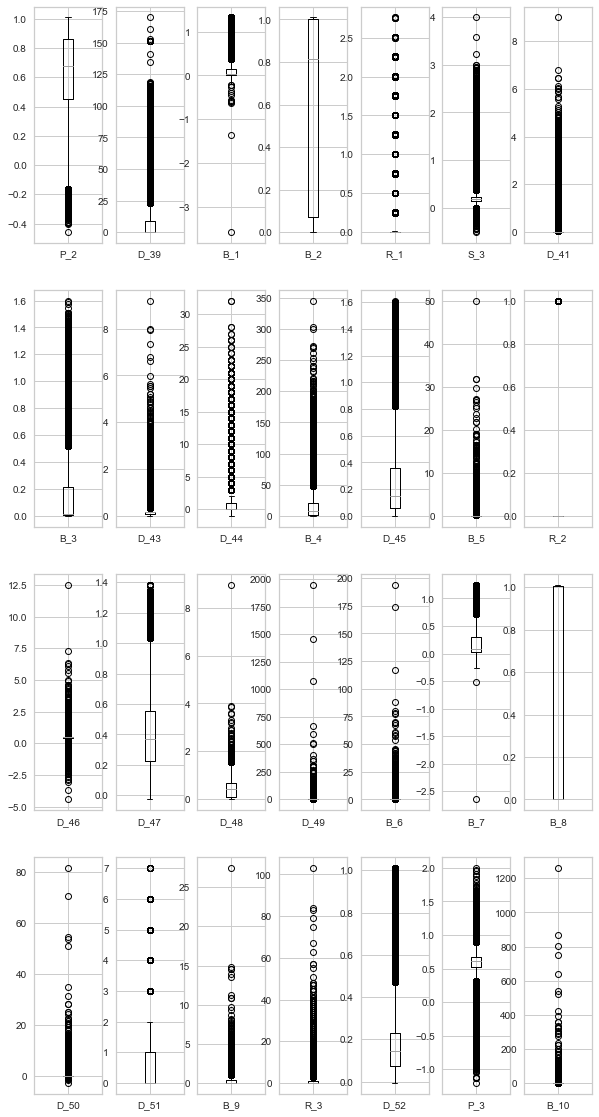

In [43]:
fig,axes=plt.subplots(4,7,figsize=(10,20))
for i,el in enumerate(list(df_num.columns.values)[:]):
    a = df_num.boxplot(el, ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

In [ ]:
#x = df_train.corr()

In [44]:
#plt.figure(figsize = (12,10))
#sns.heatmap(x, annot = True)

In [45]:
#x


In [46]:
df2 = df_train.filter(regex='D')

In [47]:
df2

,customer_ID,D_39,D_41,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_74,D_75,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_133,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.0,0.164,0,0.740,0.421,0.540,0.192,-1,0.153,2,0.204,0.115,1.0,0.187,0.167,0.007,8,0.258,0.228,0.447,0,0,0,-1,6,0.005,0,0.378,0,0,0,0.421,0,0,1,0,1,0,0,0,-1,0,2,0,0,0,0,0.943,1,1.015,1.074,-1,2,-1,0,-1,1.0,0,1,0.256,0,5,0.260,0.257,0,0.720,3,0,16,0,2,1,1.000,1,0.000,0.000,0.006,-1,-1,-1,-1,0,0,0.00,0,0.003,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,6,0.0,0.061,0,0.266,0.439,0.402,0.015,-1,0.176,1,0.242,0.115,1.0,0.036,0.748,0.010,15,0.412,0.049,0.234,3,0,0,-1,6,0.008,0,0.008,0,0,0,0.228,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.002,0,0.000,0.378,-1,0,-1,0,-1,1.0,0,1,0.454,0,0,0.446,0.437,0,0.551,2,0,4,0,2,0,0.999,0,0.000,0.000,0.003,-1,-1,-1,-1,0,0,0.00,0,0.003,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.0,0.164,0,0.252,0.434,0.339,0.080,-1,0.176,1,0.202,0.115,1.0,0.099,0.209,0.003,15,0.003,0.138,0.439,3,2,0,-1,6,0.009,0,0.015,0,0,0,0.407,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.010,0,0.000,0.378,-1,0,-1,0,-1,1.0,0,1,0.389,0,0,0.368,0.369,0,0.445,1,0,7,0,2,0,0.000,0,0.000,0.000,0.010,-1,-1,-1,-1,0,0,0.00,0,0.001,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.0,0.046,0,0.085,0.411,0.414,0.409,-1,0.430,1,0.198,0.001,1.0,0.021,0.554,0.009,29,0.395,0.027,0.435,3,0,0,-1,3,0.005,0,0.011,0,0,0,0.401,0,0,0,0,-1,0,0,0,-1,0,1,0,0,0,0,0.002,0,0.000,0.378,-1,0,-1,0,-1,1.0,1,1,0.059,0,7,0.059,0.063,0,0.629,2,0,14,0,2,0,1.003,1,0.000,0.000,0.002,-1,-1,-1,-1,0,0,0.00,0,0.006,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.0,0.045,0,0.070,0.466,0.480,0.325,-1,0.095,0,0.254,0.115,1.0,0.254,0.183,0.383,28,0.003,0.601,0.423,3,0,0,1,6,0.008,0,0.016,0,2,2,0.393,0,0,2,0,-1,0,0,0,-1,0,0,0,0,0,0,0.589,1,0.963,0.809,-1,3,-1,0,-1,1.0,0,1,0.448,0,5,0.442,0.436,0,0.566,3,0,5,0,2,0,1.006,1,1.006,0.000,0.005,-1,-1,-1,-1,0,0,0.00,0,0.007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,15,0.0,0.113,0,0.073,0.488,0.215,0.059,-1,0.176,2,0.211,0.115,1.0,0.035,0.209,0.009,22,0.943,0.074,0.457,3,3,0,1,6,0.003,0,0.007,0,0,0,0.424,0,0,0,0,-1,0,0,1,-1,0,0,2,0,0,0,0.119,1,0.952,0.132,-1,2,-1,0,-1,1.0,0,0,0.226,0,4,0.217,0.218,1,0.375,6,0,9,0,2,0,0.000,0,0.000,0.000,0.002,-1,-1,-1,-1,0,0,0.00,0,0.003,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,1,0.0,0.135,1,0.618,0.495,0.775,0.171,1,0.176,1,0.351,0.115,1.0,0.146,0.209,0.484,28,0.134,0.730,0.094,3,2,0,-1,6,0.007,1,0.011,0,4,5,0.260,0,1,1,0,-1,0,0,0,-1,0,1,0,0,0,0,0.555,1,0.957,0.830,0,2,-1,0,-1,1.0,0,1,0.586,0,3,0.578,0.574,0,0.591,2,0,7,0,2,0,0.999,0,1.005,1.006,1.129,-1,-1,-1,-1,0,0,0.00,0,0.009,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,9,0.0,0.050,0,0.134,0.511,0.326,0.114,-1,0.174,1,0.185,0.115,1.0,0.107,0.325,0.008,21,0.081,0.136,0.223,3,3,0,-1,5,0.001,0,0.008,0,0,0,0.206,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.147,1,0.963,0.118,-1,1,-1,0,-1,1.0,0,1,0.112,0,0,0.368,0.366,0,0.415,1,0,5,0,2,1,1.008,1,0.000,0.000,0.005,-1,-1,-1,-1,0,0,0.00,0,0.000,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0,0.0,0.046,1,0.070,0.525,0.592,0.349,-1,0.176,0,0.138,0.115,1.0,0.297,0.209,0.259,28,0.029,0.806,0.313,3,3,0,-1,3,0.009,0,0.010,0,1,2,0.289,0,0,3,0,-1,0,0,0,

In [48]:
from scipy.stats import spearmanr
#for column in df2.columns
    #spearmanr(data1, data2)


In [49]:
df_train.filter(regex='R')

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
0,0.006,0,0,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.006,0
1,0.007,0,1,0,0,0.008,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.008,0
2,0.006,0,0,0,0,0.009,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003,0
3,0.008,0,2,0,0,0.001,0.0,0,-1,0,1,1.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,-1,1.004,0
4,0.001,0,0,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.002,0,7,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003,0
458909,0.007,0,1,0,0,0.009,0.0,0,-1,0,1,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.007,0
458910,0.001,0,0,0,0,0.003,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.009,0
458911,0.001,0,0,0,0,0.003,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.004,0


In [50]:
df2

,customer_ID,D_39,D_41,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_74,D_75,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_133,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.0,0.164,0,0.740,0.421,0.540,0.192,-1,0.153,2,0.204,0.115,1.0,0.187,0.167,0.007,8,0.258,0.228,0.447,0,0,0,-1,6,0.005,0,0.378,0,0,0,0.421,0,0,1,0,1,0,0,0,-1,0,2,0,0,0,0,0.943,1,1.015,1.074,-1,2,-1,0,-1,1.0,0,1,0.256,0,5,0.260,0.257,0,0.720,3,0,16,0,2,1,1.000,1,0.000,0.000,0.006,-1,-1,-1,-1,0,0,0.00,0,0.003,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,6,0.0,0.061,0,0.266,0.439,0.402,0.015,-1,0.176,1,0.242,0.115,1.0,0.036,0.748,0.010,15,0.412,0.049,0.234,3,0,0,-1,6,0.008,0,0.008,0,0,0,0.228,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.002,0,0.000,0.378,-1,0,-1,0,-1,1.0,0,1,0.454,0,0,0.446,0.437,0,0.551,2,0,4,0,2,0,0.999,0,0.000,0.000,0.003,-1,-1,-1,-1,0,0,0.00,0,0.003,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.0,0.164,0,0.252,0.434,0.339,0.080,-1,0.176,1,0.202,0.115,1.0,0.099,0.209,0.003,15,0.003,0.138,0.439,3,2,0,-1,6,0.009,0,0.015,0,0,0,0.407,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.010,0,0.000,0.378,-1,0,-1,0,-1,1.0,0,1,0.389,0,0,0.368,0.369,0,0.445,1,0,7,0,2,0,0.000,0,0.000,0.000,0.010,-1,-1,-1,-1,0,0,0.00,0,0.001,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.0,0.046,0,0.085,0.411,0.414,0.409,-1,0.430,1,0.198,0.001,1.0,0.021,0.554,0.009,29,0.395,0.027,0.435,3,0,0,-1,3,0.005,0,0.011,0,0,0,0.401,0,0,0,0,-1,0,0,0,-1,0,1,0,0,0,0,0.002,0,0.000,0.378,-1,0,-1,0,-1,1.0,1,1,0.059,0,7,0.059,0.063,0,0.629,2,0,14,0,2,0,1.003,1,0.000,0.000,0.002,-1,-1,-1,-1,0,0,0.00,0,0.006,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.0,0.045,0,0.070,0.466,0.480,0.325,-1,0.095,0,0.254,0.115,1.0,0.254,0.183,0.383,28,0.003,0.601,0.423,3,0,0,1,6,0.008,0,0.016,0,2,2,0.393,0,0,2,0,-1,0,0,0,-1,0,0,0,0,0,0,0.589,1,0.963,0.809,-1,3,-1,0,-1,1.0,0,1,0.448,0,5,0.442,0.436,0,0.566,3,0,5,0,2,0,1.006,1,1.006,0.000,0.005,-1,-1,-1,-1,0,0,0.00,0,0.007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,15,0.0,0.113,0,0.073,0.488,0.215,0.059,-1,0.176,2,0.211,0.115,1.0,0.035,0.209,0.009,22,0.943,0.074,0.457,3,3,0,1,6,0.003,0,0.007,0,0,0,0.424,0,0,0,0,-1,0,0,1,-1,0,0,2,0,0,0,0.119,1,0.952,0.132,-1,2,-1,0,-1,1.0,0,0,0.226,0,4,0.217,0.218,1,0.375,6,0,9,0,2,0,0.000,0,0.000,0.000,0.002,-1,-1,-1,-1,0,0,0.00,0,0.003,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,1,0.0,0.135,1,0.618,0.495,0.775,0.171,1,0.176,1,0.351,0.115,1.0,0.146,0.209,0.484,28,0.134,0.730,0.094,3,2,0,-1,6,0.007,1,0.011,0,4,5,0.260,0,1,1,0,-1,0,0,0,-1,0,1,0,0,0,0,0.555,1,0.957,0.830,0,2,-1,0,-1,1.0,0,1,0.586,0,3,0.578,0.574,0,0.591,2,0,7,0,2,0,0.999,0,1.005,1.006,1.129,-1,-1,-1,-1,0,0,0.00,0,0.009,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,9,0.0,0.050,0,0.134,0.511,0.326,0.114,-1,0.174,1,0.185,0.115,1.0,0.107,0.325,0.008,21,0.081,0.136,0.223,3,3,0,-1,5,0.001,0,0.008,0,0,0,0.206,0,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0.147,1,0.963,0.118,-1,1,-1,0,-1,1.0,0,1,0.112,0,0,0.368,0.366,0,0.415,1,0,5,0,2,1,1.008,1,0.000,0.000,0.005,-1,-1,-1,-1,0,0,0.00,0,0.000,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0,0.0,0.046,1,0.070,0.525,0.592,0.349,-1,0.176,0,0.138,0.115,1.0,0.297,0.209,0.259,28,0.029,0.806,0.313,3,3,0,-1,3,0.009,0,0.010,0,1,2,0.289,0,0,3,0,-1,0,0,0,

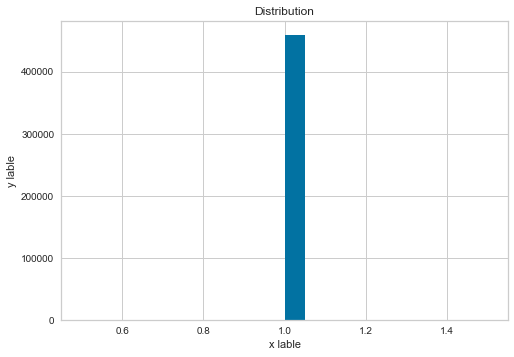

In [51]:
import matplotlib.pyplot as plt
df2.value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [52]:
import matplotlib.pyplot as plt
#df2.boxplot()
#df2.hist()
df_train_labels 

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [53]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#df_train_labels
#df_train
#df2 
 #df_train_labels 
#df2.drop
X = df2.drop(['customer_ID'], axis=1)
y = df_train_labels.drop(['customer_ID'], axis=1)


In [54]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
458908,0
458909,0
458910,0
458911,1


In [55]:
df_num

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,D_87,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_111,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.935,0,0.009,1.008,0.006,0.135,0.0,0.007,0.164,0,5,0.740,0.232,0,0.421,0.540,0.192,-1,0.150,0.058,0.000,0.153,2,0.010,0,0.204,0.629,0.326,0.115,0.035,0.010,0,1.0,0,0.106,0.112,1544,0.187,0.167,0.100,0,0.007,0.007,0.010,8,0.258,0.228,0.015,15,0.447,0,0,0,0,0.725,1.000,0,-1,0,6,0.184,0.004,702,0.005,0.005,0,0,0.378,0,6,0.040,0.0,0,0,0.002,0.0,0.421,0.006,0.001,0,0,0,-1,0.000,1,0,0,0.007,0,1,0.007,1.0,0.085,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.004,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0.918,0.132,0.936,0.972,0.001,0.943,1,1.015,1.074,-1,2,0.007,0.009,-1,1.006,2,-1,0,-1,1.0,0.100,0.929,0,1,0.256,0,5,0.260,0.257,0,0.720,3,0,16,0,2,1,1.000,1,0,0.000,0.000,0.006,0,-1,-1,-1,-1,0,0,0.00,0,0.003,0,0
1,0.881,6,0.035,1.004,0.007,0.166,0.0,0.005,0.061,0,1,0.266,0.027,0,0.439,0.402,0.015,-1,0.168,0.028,0.000,0.176,1,0.013,1,0.242,0.571,0.297,0.115,0.044,0.015,0,1.0,0,0.209,0.019,1284,0.036,0.748,0.018,0,0.010,0.128,0.019,15,0.412,0.049,0.010,14,0.234,3,0,0,0,0.725,1.000,0,-1,0,6,0.192,0.008,290,0.006,0.008,0,0,0.008,0,6,0.015,0.0,0,0,0.002,0.0,0.228,0.021,0.000,0,0,0,-1,0.007,0,0,0,0.005,0,-1,0.005,1.0,0.020,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.005,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.921,0.133,0.931,0.978,0.003,0.002,0,0.000,0.378,-1,0,0.007,0.033,-1,1.008,2,-1,0,-1,1.0,0.020,0.292,0,1,0.454,0,0,0.446,0.437,0,0.551,2,0,4,0,2,0,0.999,0,0,0.000,0.000,0.003,0,-1,-1,-1,-1,0,0,0.00,0,0.003,0,0
2,0.881,0,0.004,0.813,0.006,0.229,0.0,0.007,0.164,0,2,0.252,0.002,0,0.434,0.339,0.080,-1,0.184,0.027,0.000,0.176,1,0.009,0,0.202,0.629,0.296,0.115,0.002,0.005,1,1.0,0,0.222,0.007,0,0.099,0.209,0.002,0,0.003,0.044,0.007,15,0.003,0.138,0.006,12,0.439,3,2,0,0,0.725,1.000,0,-1,0,6,0.191,0.009,0,0.000,0.009,0,0,0.015,0,8,0.020,0.0,0,0,0.001,0.0,0.407,0.007,0.010,0,0,0,-1,0.009,0,0,0,0.005,0,-1,0.000,1.0,0.030,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.006,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.303,0.133,0.086,0.972,0.005,0.010,0,0.000,0.378,-1,0,0.005,0.005,-1,1.003,1,-1,0,-1,1.0,0.025,0.309,0,1,0.389,0,0,0.368,0.369,0,0.445,1,0,7,0,2,0,0.000,0,0,0.000,0.000,0.010,0,-1,-1,-1,-1,0,0,0.00,0,0.001,0,0
3,0.622,0,0.013,1.006,0.008,0.288,0.0,0.010,0.046,0,0,0.085,0.119,0,0.411,0.414,0.409,-1,0.174,0.012,1.006,0.430,1,0.021,2,0.198,0.672,0.412,0.001,0.023,0.005,0,1.0,0,0.279,0.075,528,0.021,0.554,0.056,0,0.009,0.011,0.017,29,0.395,0.027,0.002,14,0.435,3,0,0,1,1.007,1.000,0,-1,0,3,0.055,0.001,435,0.004,0.005,0,0,0.011,0,8,0.005,0.0,0,0,0.009,0.0,0.401,0.014,0.005,0,0,0,-1,0.007,0,0,1,0.008,0,-1,0.008,1.0,0.010,0,0,0.0,0,0,1,0,0,0,-1,0,0,1,0.005,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.932,0.133,0.957,0.974,0.044,0.002,0,0.000,0.378,-1,0,0.005,0.007,-1,1.004,2,-1,0,-1,1.0,0.031,0.681,1,1,0.059,0,7,0.059,0.063,0,0.629,2,0,14,0,2,0,1.003,1,0,0.000,0.000,0.002,0,-1,-1,-1,-1,0,0,0.00,0,0.006,0,0
4,0.872,0,0.008,0.816,0.001,0.229,0.0,0.006,0.045,0,21,0.070,0.005,0,0.466,0.480,0.325,-1,0.049,0.160,1.005,0.095,0,0.004,0,0.254,0.570,0.125,0.115,0.009,0.001,1,1.0,0,0.222,0.013,0,0.254,0.183,0.006,0,0.383,0.044,0.009,28,0.003,0.601,0.006,13,0.423,3,0,0,0,0.725,0.531,0,1,0,6,0.186,0.004,0,0.010,0.008,0,0,0.016,0,8,0.145,0.0,2,2,0.01

# #mutual information Features

Index(['D_39', 'D_41', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49',
       'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59',
       'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_66', 'D_68', 'D_69',
       'D_70', 'D_71', 'D_72', 'D_74', 'D_75', 'D_77', 'D_78', 'D_79', 'D_80',
       'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_89', 'D_91', 'D_92',
       'D_93', 'D_94', 'D_96', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106',
       'D_107', 'D_108', 'D_109', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115',
       'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123',
       'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131',
       'D_133', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141',
       'D_143', 'D_144', 'D_145'],
      dtype='object')


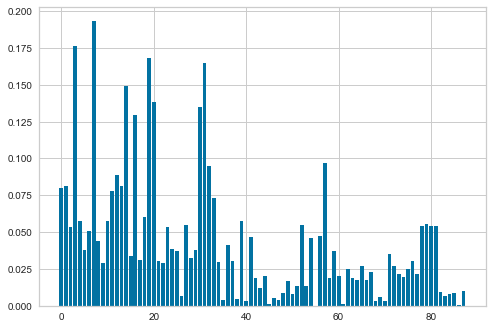

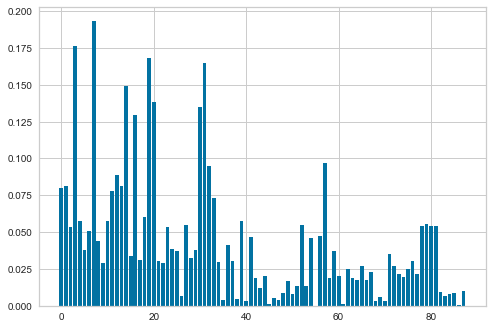

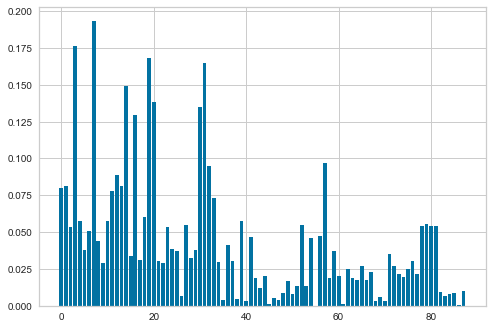

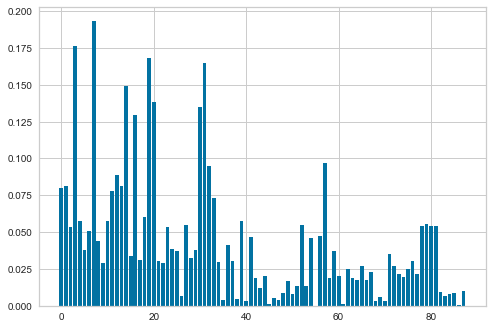

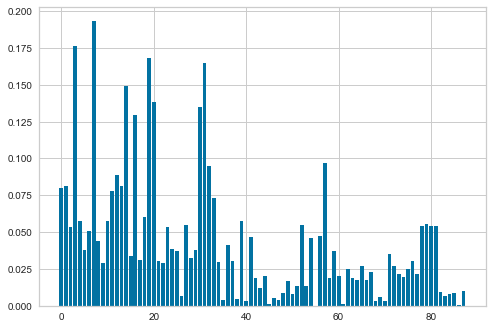

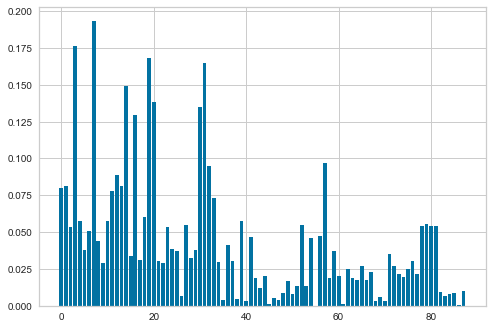

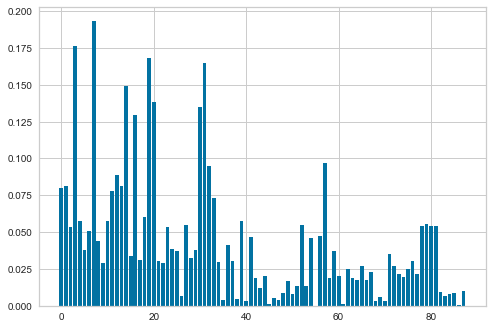

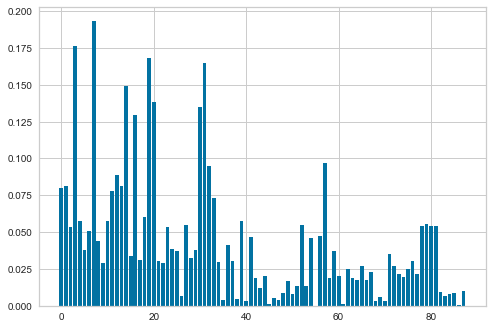

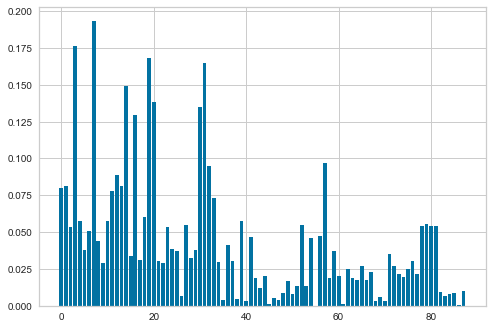

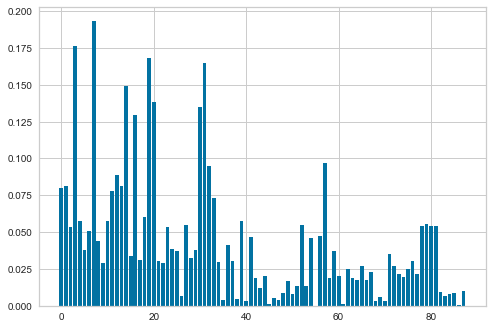

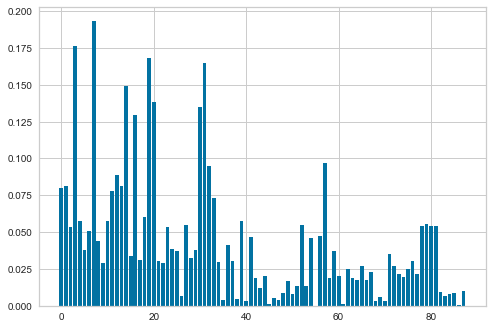

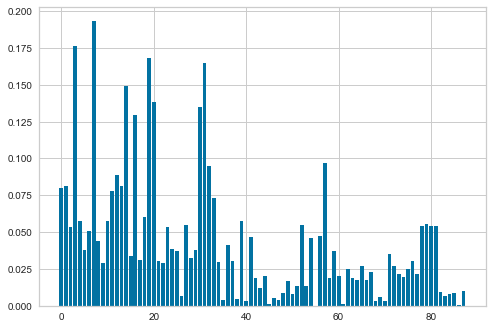

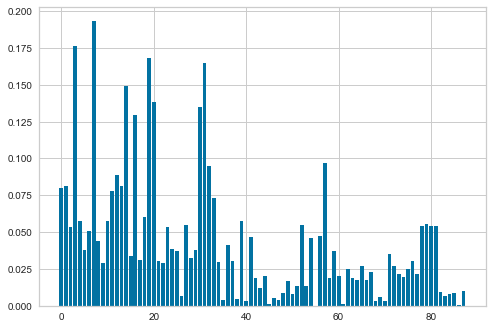

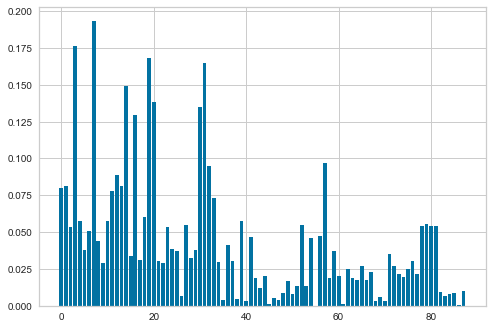

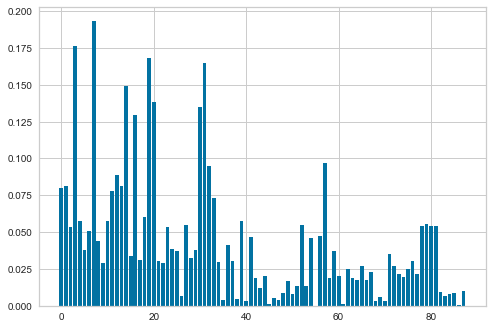

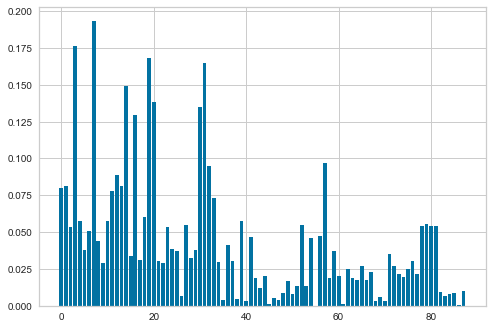

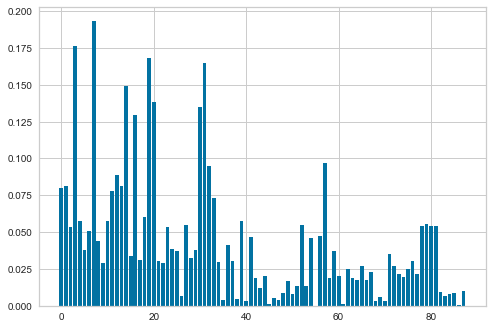

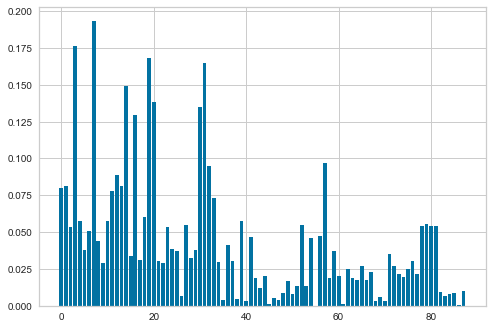

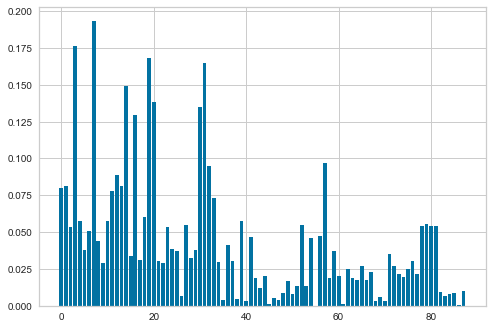

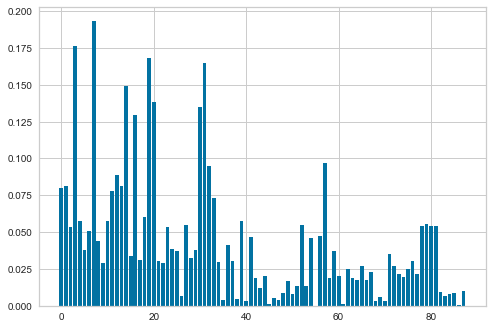

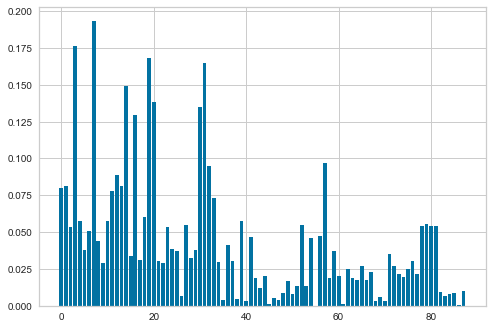

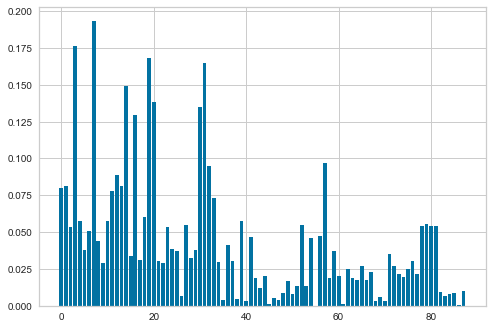

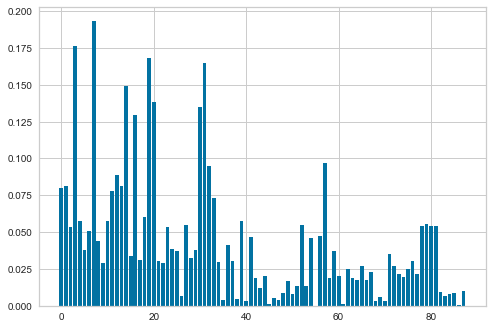

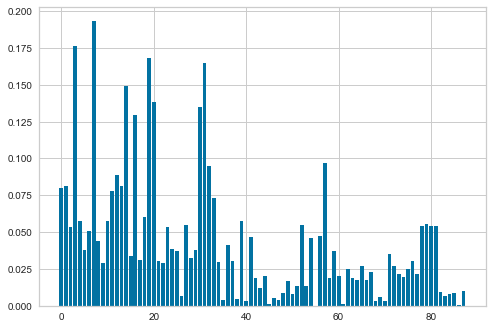

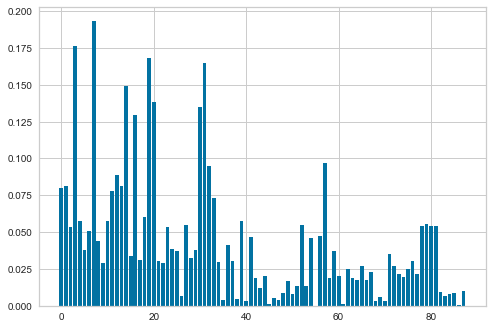

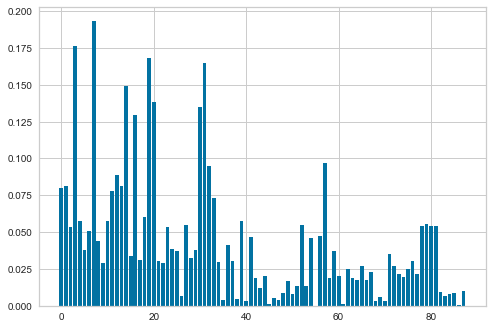

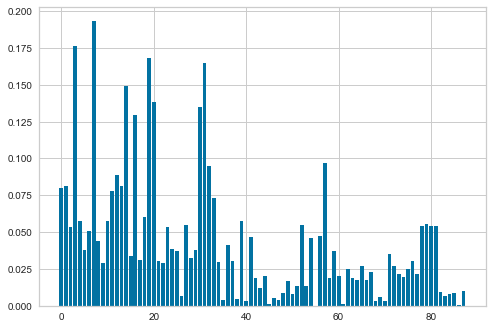

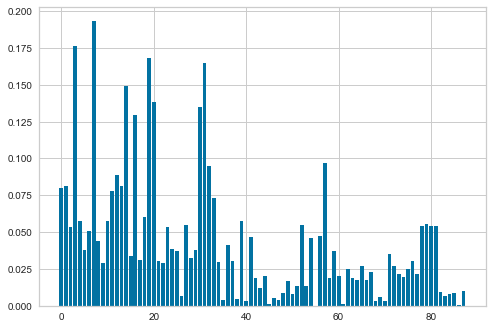

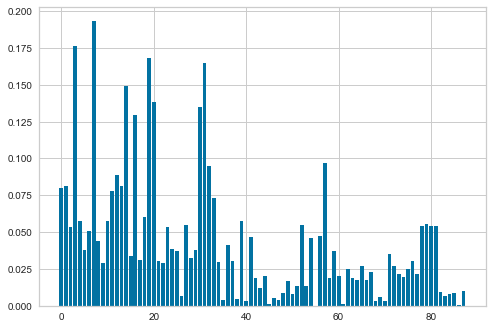

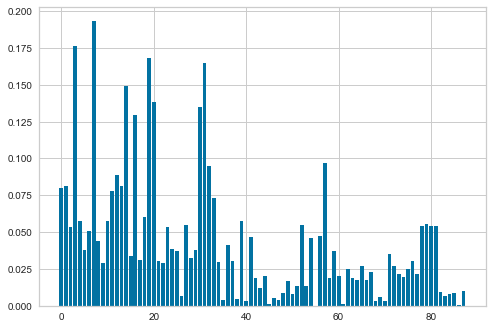

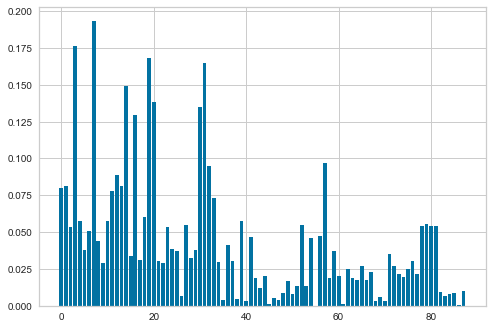

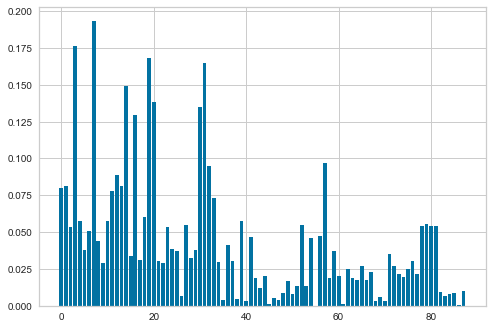

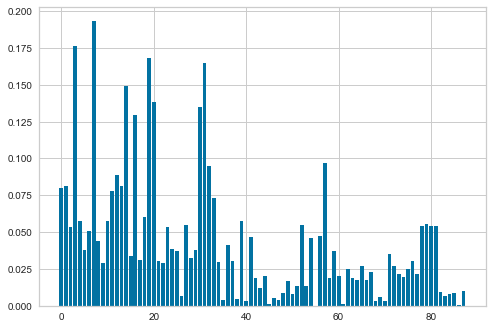

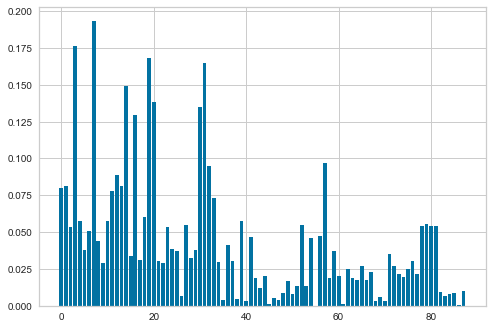

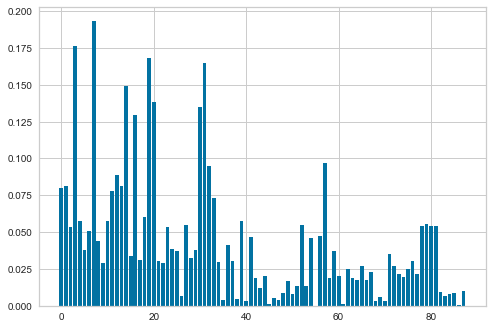

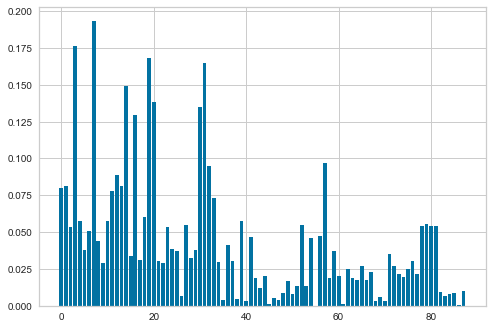

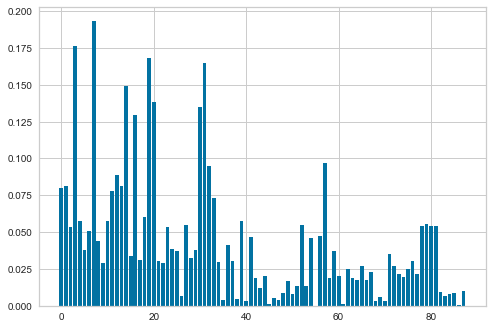

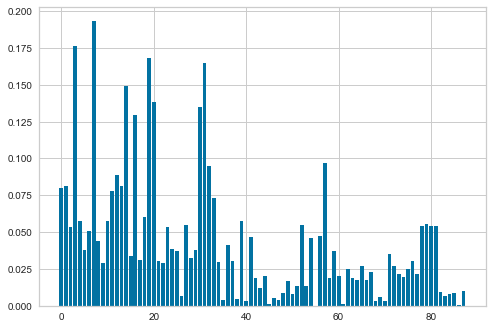

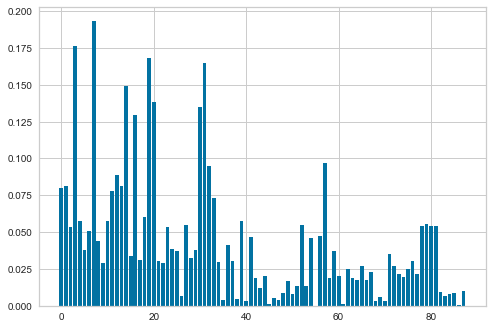

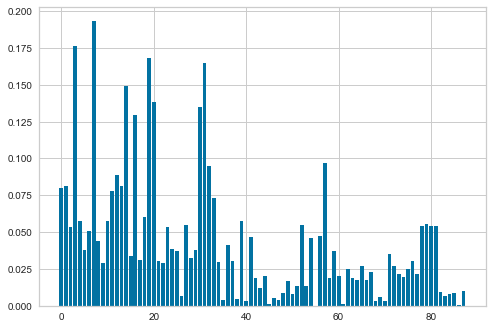

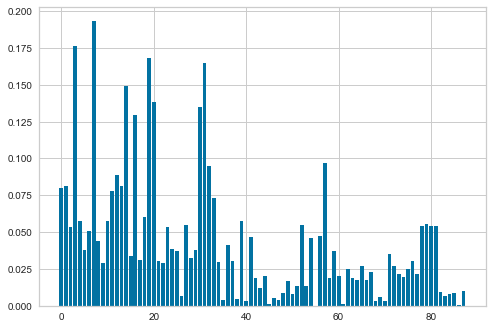

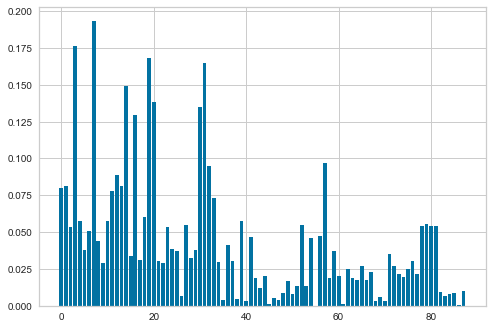

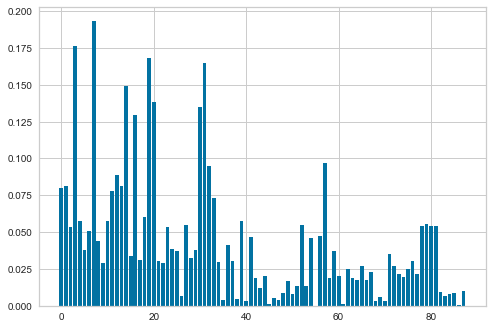

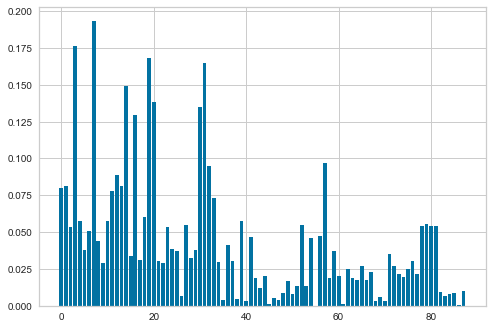

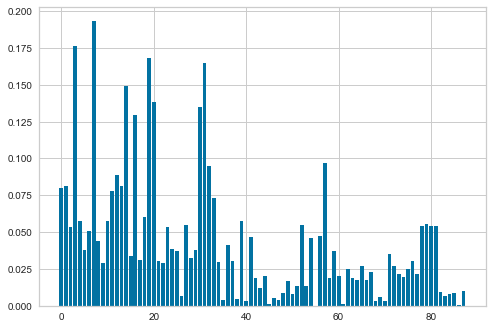

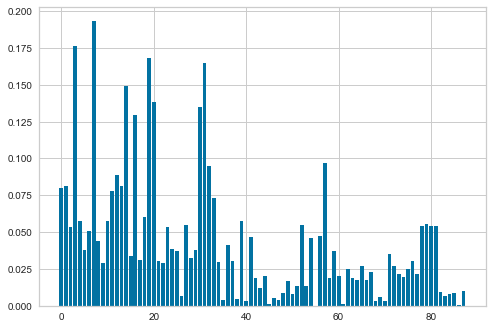

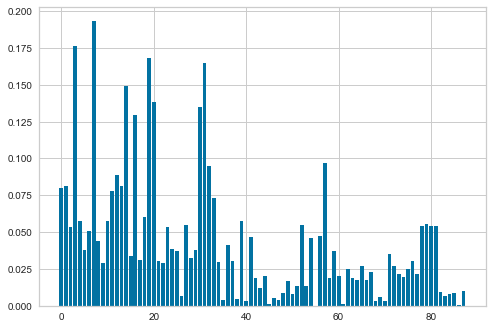

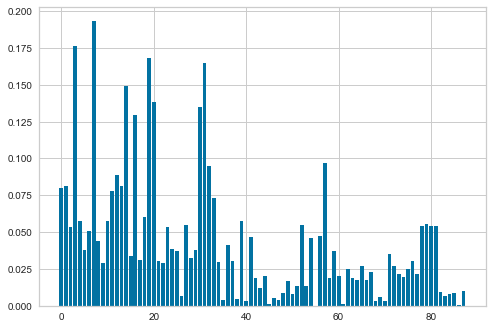

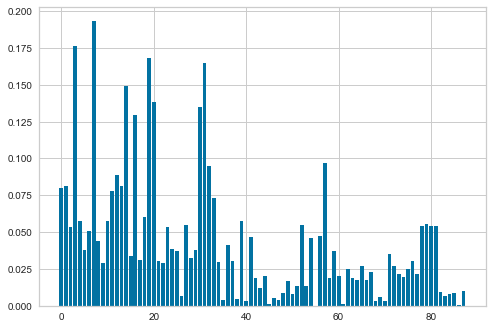

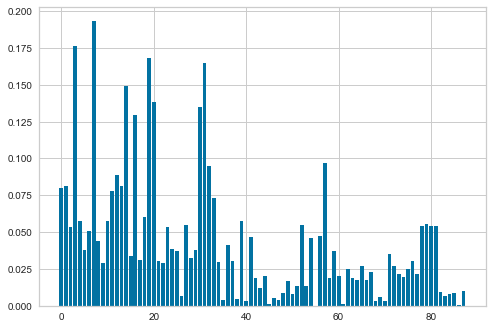

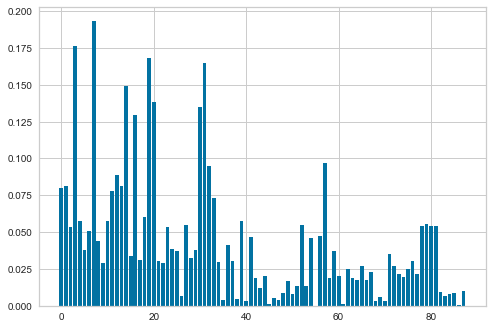

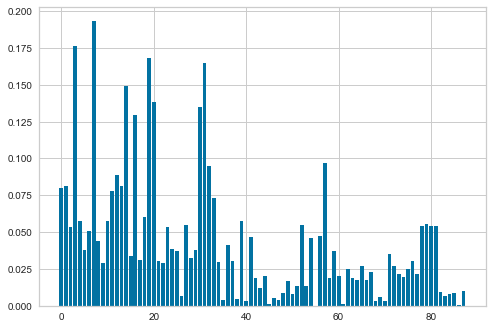

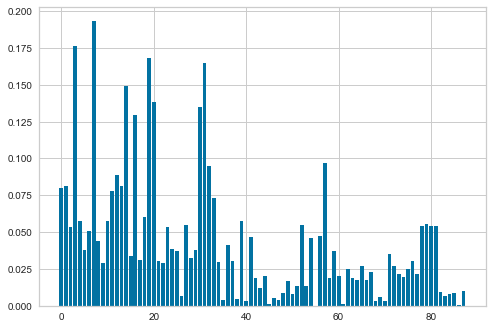

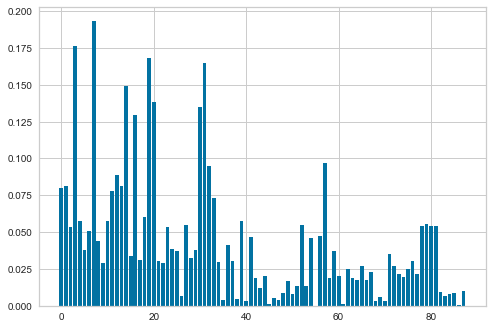

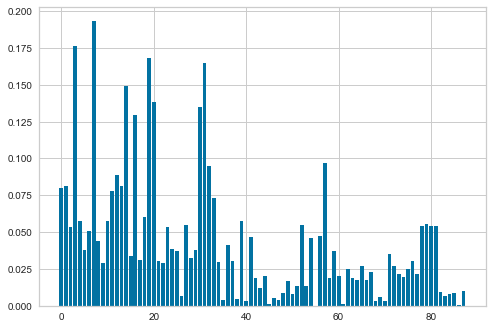

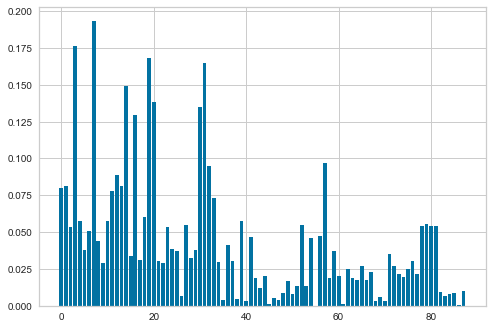

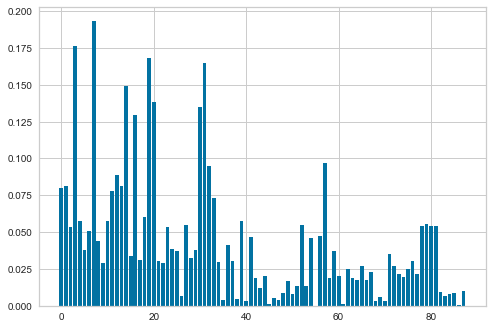

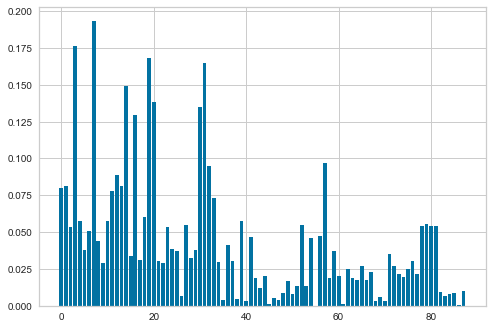

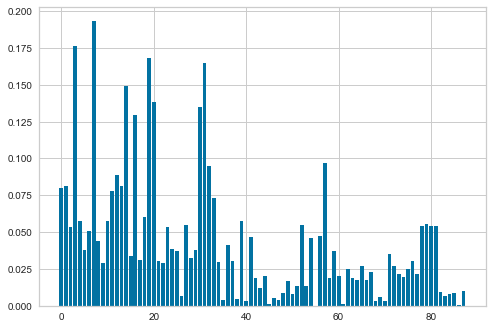

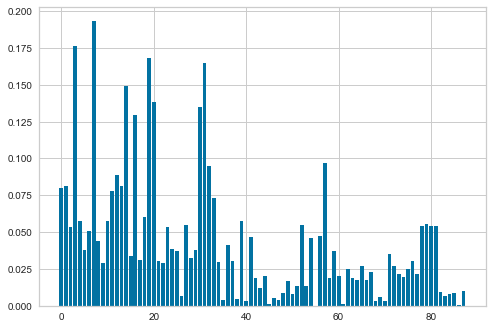

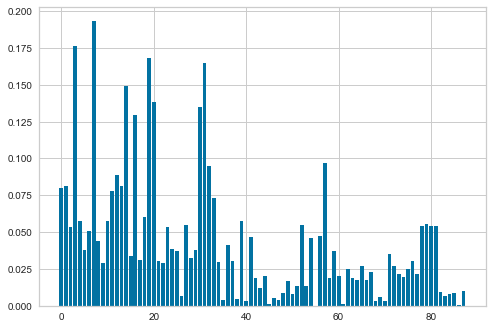

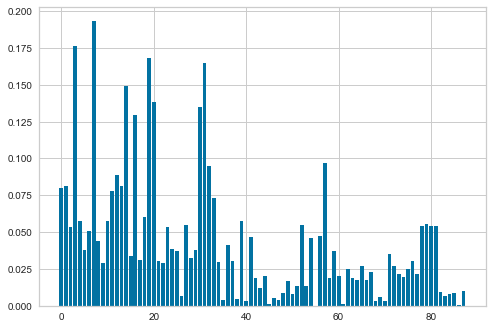

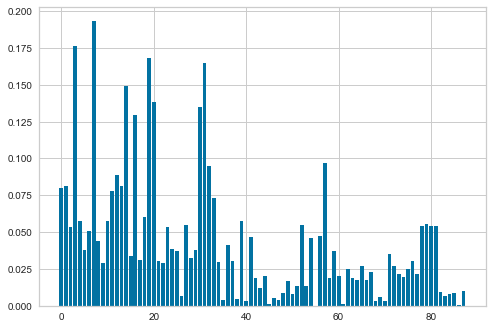

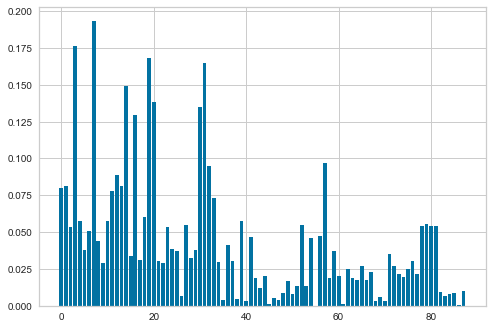

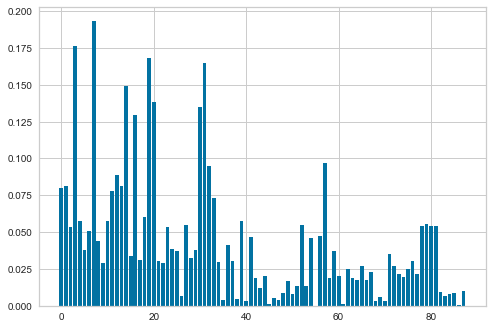

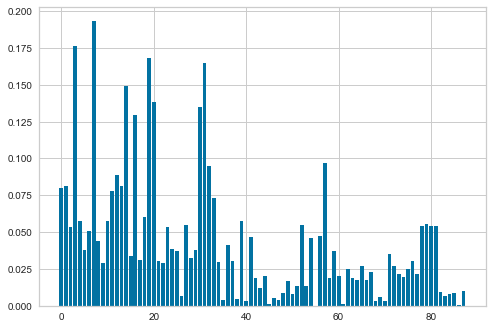

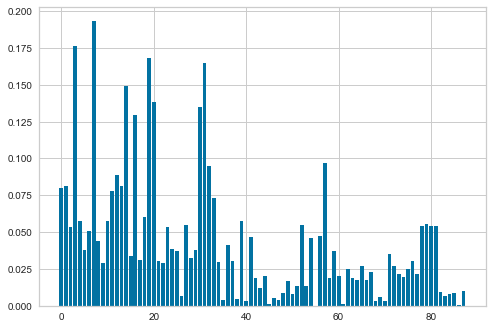

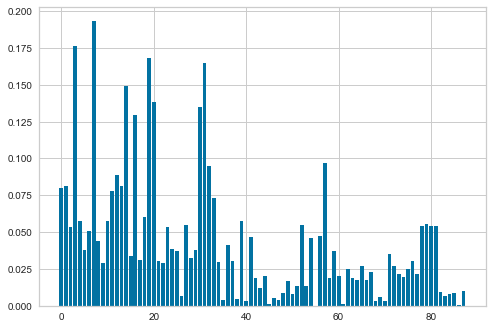

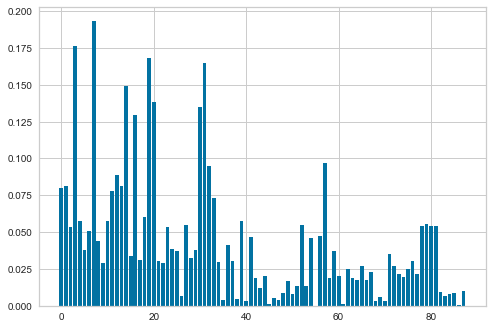

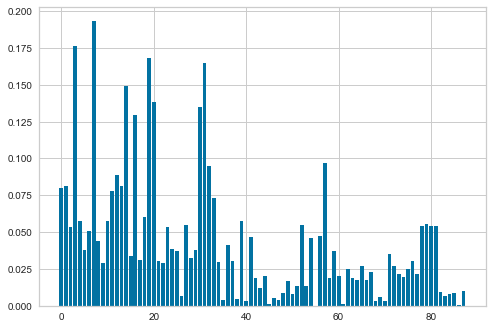

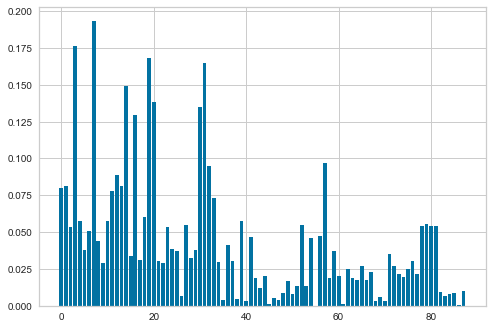

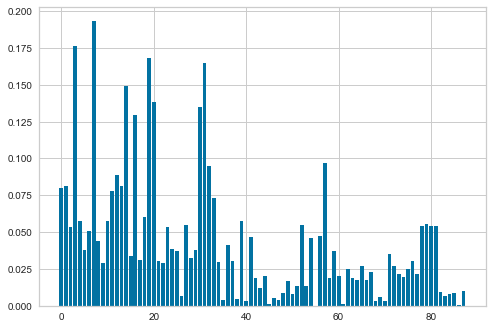

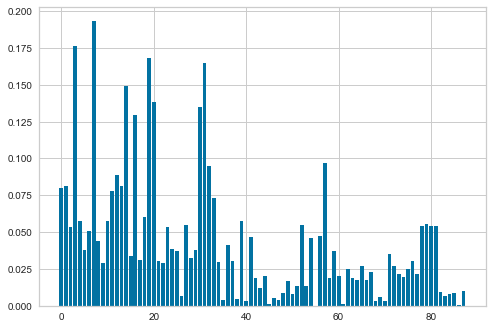

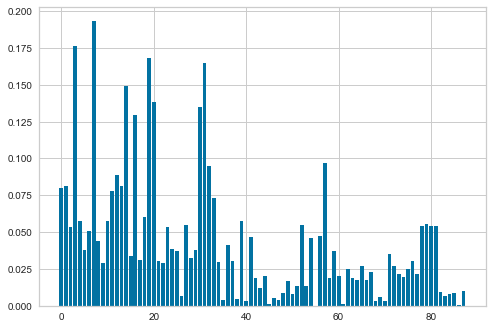

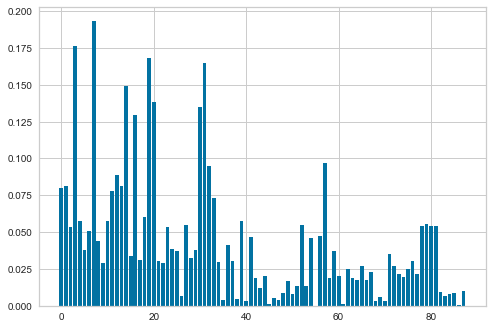

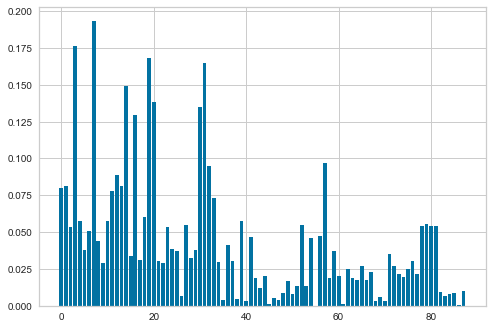

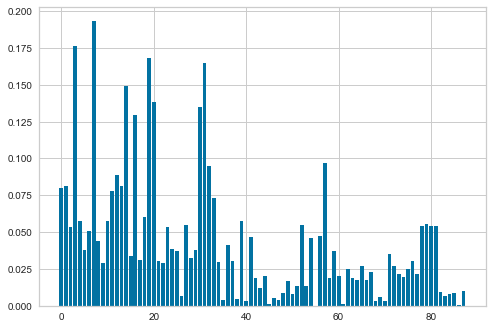

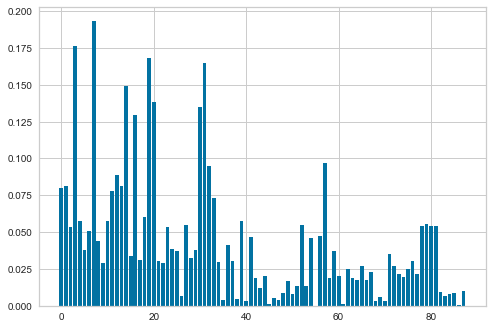

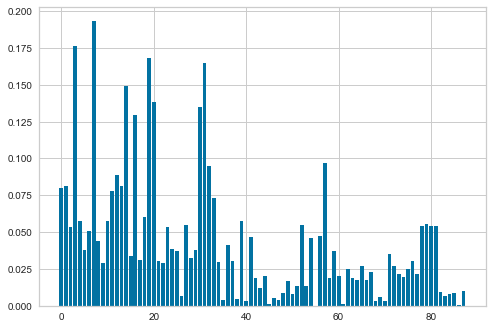

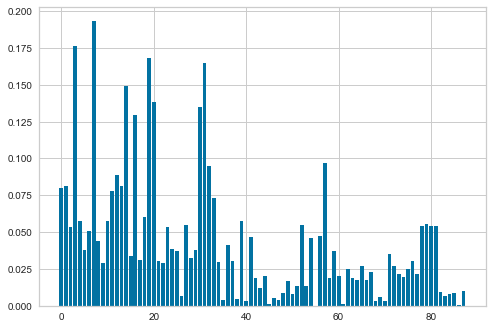

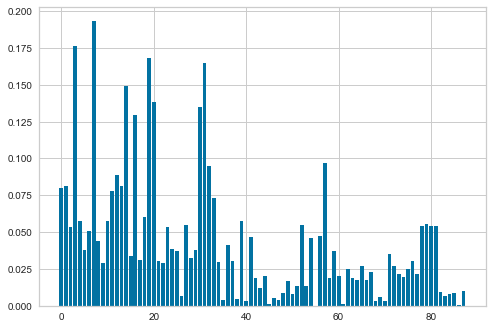

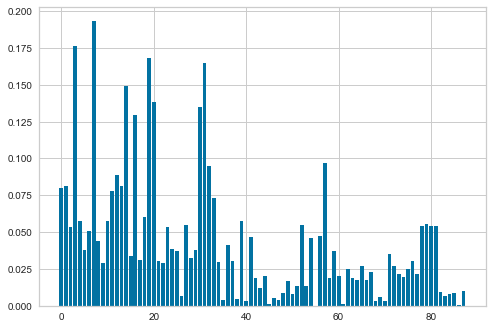

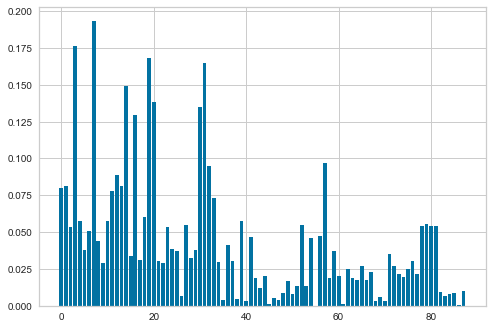

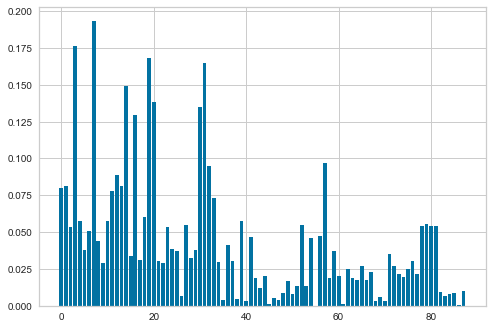

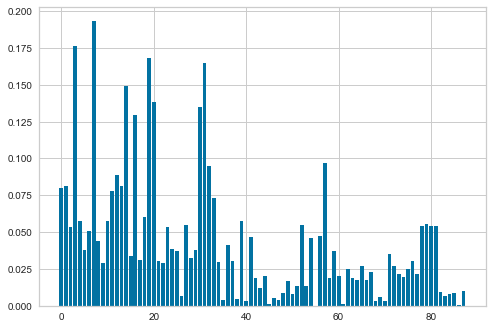

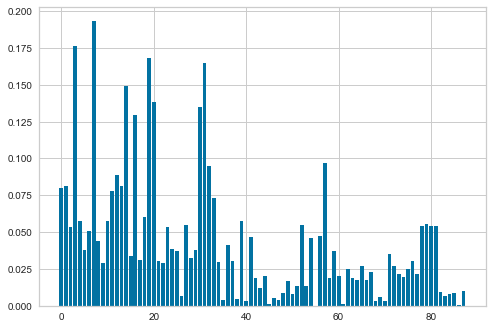

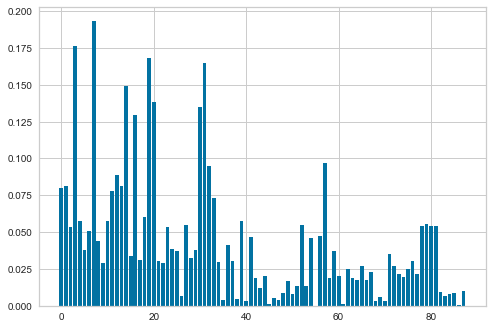

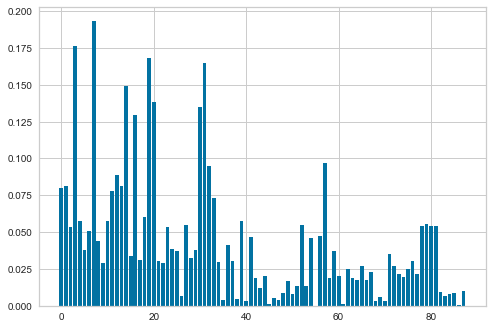

In [56]:

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
    
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new)   
    
    
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
# plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()

# USING MUTUAL_INFORMATION

In [57]:

# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=16)
	# learn relationship from training data
	fs.fit(X_train, y_train)
    
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new)  
    
    
    
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Index(['D_39', 'D_41', 'D_44', 'D_48', 'D_52', 'D_53', 'D_54', 'D_55', 'D_58',
       'D_61', 'D_62', 'D_74', 'D_75', 'D_77', 'D_78', 'D_112'],
      dtype='object')
Accuracy: 86.12


# F_ANOVA STATISTICS

Feature 0: 39808.952194
Feature 1: 51440.009626
Feature 2: 21347.006312
Feature 3: 105903.281445
Feature 4: 22115.757936
Feature 5: 6632.895752
Feature 6: 27581.000269
Feature 7: 162343.859223
Feature 8: 5125.934026
Feature 9: 565.849368
Feature 10: 23657.478313
Feature 11: 16900.264933
Feature 12: 10563.852144
Feature 13: 25684.815565
Feature 14: 117956.919025
Feature 15: 2426.486863
Feature 16: 100920.840146
Feature 17: 13243.917147
Feature 18: 1880.416164
Feature 19: 118013.829594
Feature 20: 44364.897735
Feature 21: 2372.814682
Feature 22: 11191.304322
Feature 23: 4600.714804
Feature 24: 864.039856
Feature 25: 8672.854257
Feature 26: 74.558106
Feature 27: 34896.277351
Feature 28: 2500.110661
Feature 29: 17794.743809
Feature 30: 81670.128985
Feature 31: 101435.482653
Feature 32: 14604.693121
Feature 33: 35486.204698
Feature 34: 17683.068681
Feature 35: 1149.024924
Feature 36: 21290.234995
Feature 37: 792.351072
Feature 38: 1582.316940
Feature 39: 23625.290858
Feature 40: 1353.382357

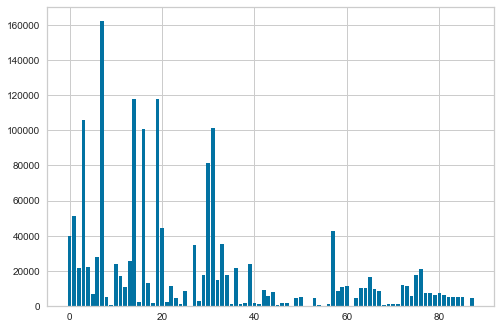

In [58]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# evaluation of a model using 4 features chosen with anova f-test

In [59]:

# 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=16)
	print(fs)

	# learn relationship from training data
	fs.fit(X_train, y_train)
    
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new)    
    
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

SelectKBest(k=16)
Index(['D_39', 'D_41', 'D_44', 'D_47', 'D_48', 'D_51', 'D_54', 'D_55', 'D_58',
       'D_61', 'D_62', 'D_70', 'D_74', 'D_75', 'D_78', 'D_112'],
      dtype='object')
Accuracy: 86.75


In [60]:
from sklearn.feature_selection import VarianceThreshold

var_tresh = VarianceThreshold(threshold=0.1)
tr_data = var_tresh.fit_transform(X)
tr_data

array([[0.   , 0.   , 0.192, ..., 0.   , 0.   , 0.   ],
       [6.   , 0.   , 0.015, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.08 , ..., 0.   , 0.   , 0.   ],
       ...,
       [9.   , 0.   , 0.114, ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.349, ..., 0.95 , 1.   , 2.   ],
       [0.   , 0.   , 0.019, ..., 0.   , 0.   , 0.   ]], dtype=float32)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(estimator = model,
          n_features_to_select=10
)

rfe.fit(X,y)
X_transformed = rfe.transform(X)

In [68]:
X_transformed

array([[0.   , 0.164, 0.74 , ..., 0.   , 0.   , 0.006],
       [0.   , 0.061, 0.266, ..., 0.   , 0.   , 0.003],
       [0.   , 0.164, 0.252, ..., 0.   , 0.   , 0.01 ],
       ...,
       [0.   , 0.05 , 0.134, ..., 0.   , 0.   , 0.005],
       [0.   , 0.046, 0.07 , ..., 2.   , 0.   , 0.   ],
       [0.   , 0.013, 0.751, ..., 1.   , 0.   , 0.006]], dtype=float32)

In [93]:
B_ser = df_train.filter(regex='B')
B_ser

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_40,B_41
0,0.009,1.008,0.007,5,0.232,0.150,0.058,0.000,0.010,0.326,0.010,0.112,0.100,0.010,0.015,0,0.725,1.000,0,0,0.005,0,0.040,0.002,0.006,0.001,0.007,0.085,0,1,0,1,0.007,0.009,2,0.100,0
1,0.035,1.004,0.005,1,0.027,0.168,0.028,0.000,0.013,0.297,0.015,0.019,0.018,0.019,0.010,0,0.725,1.000,0,0,0.006,0,0.015,0.002,0.021,0.000,0.005,0.020,0,1,0,1,0.007,0.033,2,0.020,0
2,0.004,0.813,0.007,2,0.002,0.184,0.027,0.000,0.009,0.296,0.005,0.007,0.002,0.007,0.006,0,0.725,1.000,0,0,0.000,0,0.020,0.001,0.007,0.010,0.005,0.030,0,1,0,1,0.005,0.005,1,0.025,0
3,0.013,1.006,0.010,0,0.119,0.174,0.012,1.006,0.021,0.412,0.005,0.075,0.056,0.017,0.002,1,1.007,1.000,0,0,0.004,0,0.005,0.009,0.014,0.005,0.008,0.010,0,1,0,1,0.005,0.007,2,0.031,0
4,0.008,0.816,0.006,21,0.005,0.049,0.160,1.005,0.004,0.125,0.001,0.013,0.006,0.009,0.006,0,0.725,0.531,0,0,0.010,0,0.145,0.010,0.010,0.006,0.001,0.250,0,1,0,1,0.002,0.008,1,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.029,1.010,0.006,4,0.041,0.317,0.030,1.006,0.170,0.436,0.024,0.285,0.342,0.155,0.005,0,0.725,1.000,0,0,0.004,0,0.025,0.005,0.271,0.007,0.005,0.081,0,1,0,1,0.004,0.028,2,0.008,0
458909,0.292,0.056,0.233,19,0.019,0.012,0.272,0.000,0.143,0.021,0.234,0.008,0.007,0.070,0.010,12,0.861,0.098,75,17,0.003,0,0.263,0.005,0.114,0.005,0.007,0.218,0,1,1,0,0.008,0.291,7,0.204,0
458910,0.021,1.007,0.006,6,0.020,0.190,0.049,1.002,0.046,0.303,0.011,0.049,0.036,0.018,0.008,2,0.228,1.000,0,0,0.005,0,0.037,0.010,0.032,0.007,0.001,0.093,0,1,0,1,0.004,0.020,3,0.051,0
458911,0.016,0.714,0.050,18,0.021,0.018,0.303,1.005,0.016,0.035,0.003,0.010,0.007,0.012,0.003,6,0.737,0.465,0,3,0.005,0,0.264,0.004,0.009,0.008,0.006,0.104,0,1,0,0,0.004,0.021,3,0.329,0


# B_SERIES(39)


In [94]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#df_train_labels
#df_train
#df2 
 #df_train_labels 
#df2.drop
X = B_ser
y = df_train_labels.drop(['customer_ID'], axis=1)

In [95]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test,k):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new) 
	print(k)     
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
for k in range(5,28):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,k)
# fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
# evaluate the model
    yhat = model.predict(X_test_fs)
# evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %.2f' % (accuracy*100))

Index(['B_2', 'B_7', 'B_9', 'B_18', 'B_33'], dtype='object')
5
Accuracy: 84.04
Index(['B_2', 'B_3', 'B_7', 'B_9', 'B_18', 'B_33'], dtype='object')
6
Accuracy: 84.03
Index(['B_2', 'B_3', 'B_7', 'B_9', 'B_18', 'B_23', 'B_33'], dtype='object')
7
Accuracy: 84.01
Index(['B_1', 'B_2', 'B_3', 'B_7', 'B_9', 'B_18', 'B_23', 'B_33'], dtype='object')
8
Accuracy: 84.03
Index(['B_1', 'B_2', 'B_3', 'B_7', 'B_9', 'B_18', 'B_23', 'B_33', 'B_37'], dtype='object')
9
Accuracy: 84.04
Index(['B_1', 'B_2', 'B_3', 'B_6', 'B_7', 'B_9', 'B_18', 'B_23', 'B_33',
       'B_37'],
      dtype='object')
10
Accuracy: 84.05
Index(['B_1', 'B_2', 'B_3', 'B_6', 'B_7', 'B_9', 'B_11', 'B_18', 'B_23',
       'B_33', 'B_37'],
      dtype='object')
11
Accuracy: 84.07
Index(['B_1', 'B_2', 'B_3', 'B_6', 'B_7', 'B_9', 'B_10', 'B_11', 'B_18',
       'B_23', 'B_33', 'B_37'],
      dtype='object')
12
Accuracy: 84.07
Index(['B_1', 'B_2', 'B_3', 'B_6', 'B_7', 'B_9', 'B_10', 'B_11', 'B_18',
       'B_23', 'B_33', 'B_37', 'B_38'],
    

# R_SERIES(28)

In [77]:
R_ser = df_train.filter(regex='R')
R_ser

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
0,0.006,0,0,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.006,0
1,0.007,0,1,0,0,0.008,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.008,0
2,0.006,0,0,0,0,0.009,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003,0
3,0.008,0,2,0,0,0.001,0.0,0,-1,0,1,1.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,-1,1.004,0
4,0.001,0,0,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.002,0,7,0,0,0.004,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003,0
458909,0.007,0,1,0,0,0.009,0.0,0,-1,0,1,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.007,0
458910,0.001,0,0,0,0,0.003,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.009,0
458911,0.001,0,0,0,0,0.003,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.004,0


In [78]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#df_train_labels
#df_train
#df2 
 #df_train_labels 
#df2.drop
X = R_ser
y = df_train_labels.drop(['customer_ID'], axis=1)

In [86]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test,k):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new) 
	print(k)     
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
for k in range(5,28):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,k)
# fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
# evaluate the model
    yhat = model.predict(X_test_fs)
# evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %.2f' % (accuracy*100))

Index(['R_1', 'R_2', 'R_6', 'R_12', 'R_26'], dtype='object')
5
Accuracy: 82.42
Index(['R_1', 'R_2', 'R_6', 'R_9', 'R_12', 'R_26'], dtype='object')
6
Accuracy: 82.50
Index(['R_1', 'R_2', 'R_6', 'R_9', 'R_12', 'R_26', 'R_27'], dtype='object')
7
Accuracy: 82.42
Index(['R_1', 'R_2', 'R_5', 'R_6', 'R_9', 'R_12', 'R_26', 'R_27'], dtype='object')
8
Accuracy: 82.29
Index(['R_1', 'R_2', 'R_4', 'R_5', 'R_6', 'R_9', 'R_12', 'R_26', 'R_27'], dtype='object')
9
Accuracy: 82.68
Index(['R_1', 'R_2', 'R_4', 'R_5', 'R_6', 'R_7', 'R_9', 'R_12', 'R_26',
       'R_27'],
      dtype='object')
10
Accuracy: 82.68
Index(['R_1', 'R_2', 'R_4', 'R_5', 'R_6', 'R_7', 'R_9', 'R_10', 'R_12', 'R_26',
       'R_27'],
      dtype='object')
11
Accuracy: 82.57
Index(['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_9', 'R_10', 'R_12',
       'R_26', 'R_27'],
      dtype='object')
12
Accuracy: 83.02
Index(['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10',
       'R_12', 'R_26', 'R_27'],
      dtype=

# S_SERIES(21)

In [89]:
S_ser = df_train.filter(regex='S')
S_ser

,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
0,0.135,0.035,0,0.106,1544,0.007,15,0.184,702,6,0.000,0.007,0,0.004,0,0.918,0.132,0.936,0.972,0.001,0.929
1,0.166,0.044,0,0.209,1284,0.128,14,0.192,290,6,0.007,0.005,0,0.005,0,0.921,0.133,0.931,0.978,0.003,0.292
2,0.229,0.002,1,0.222,0,0.044,12,0.191,0,8,0.009,0.000,0,0.006,0,0.303,0.133,0.086,0.972,0.005,0.309
3,0.288,0.023,0,0.279,528,0.011,14,0.055,435,8,0.007,0.008,0,0.005,0,0.932,0.133,0.957,0.974,0.044,0.681
4,0.229,0.009,1,0.222,0,0.044,13,0.186,0,8,0.008,0.007,0,0.006,0,0.298,0.132,0.082,0.972,0.002,0.309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.129,0.262,0,0.088,1544,0.044,12,0.281,435,6,0.004,0.006,0,0.000,0,0.949,0.137,0.964,0.974,0.010,0.545
458909,0.229,0.010,1,0.222,0,0.044,12,0.188,0,8,0.006,0.001,0,0.001,0,0.301,0.139,0.079,0.976,0.003,0.309
458910,0.067,0.026,0,0.041,2694,0.017,19,0.398,544,4,0.004,0.003,0,0.005,0,0.986,0.141,0.967,0.973,0.010,0.424
458911,0.409,0.010,0,0.366,0,0.044,14,0.192,0,8,0.004,0.008,0,0.008,0,0.902,0.132,0.906,0.979,0.001,0.007


In [90]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#df_train_labels
#df_train
#df2 
 #df_train_labels 
#df2.drop
X = S_ser
y = df_train_labels.drop(['customer_ID'], axis=1)

In [92]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test,k):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new) 
	print(k)     
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
for k in range(5,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,k)
# fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
# evaluate the model
    yhat = model.predict(X_test_fs)
# evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %.2f' % (accuracy*100))

Index(['S_3', 'S_7', 'S_22', 'S_23', 'S_25'], dtype='object')
5
Accuracy: 80.84
Index(['S_3', 'S_7', 'S_22', 'S_23', 'S_24', 'S_25'], dtype='object')
6
Accuracy: 80.98
Index(['S_3', 'S_7', 'S_8', 'S_22', 'S_23', 'S_24', 'S_25'], dtype='object')
7
Accuracy: 81.81
Index(['S_3', 'S_7', 'S_8', 'S_15', 'S_22', 'S_23', 'S_24', 'S_25'], dtype='object')
8
Accuracy: 81.79
Index(['S_3', 'S_7', 'S_8', 'S_15', 'S_22', 'S_23', 'S_24', 'S_25', 'S_27'], dtype='object')
9
Accuracy: 81.79
Index(['S_3', 'S_5', 'S_7', 'S_8', 'S_15', 'S_22', 'S_23', 'S_24', 'S_25',
       'S_27'],
      dtype='object')
10
Accuracy: 81.80
Index(['S_3', 'S_5', 'S_7', 'S_8', 'S_13', 'S_15', 'S_22', 'S_23', 'S_24',
       'S_25', 'S_27'],
      dtype='object')
11
Accuracy: 81.98
Index(['S_3', 'S_5', 'S_7', 'S_8', 'S_13', 'S_15', 'S_16', 'S_22', 'S_23',
       'S_24', 'S_25', 'S_27'],
      dtype='object')
12
Accuracy: 82.13
Index(['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_13', 'S_15', 'S_16', 'S_22',
       'S_23', 'S_24', 'S_25'

# P_SERIES

In [100]:
P_ser = df_train.filter(regex='P')
P_ser

,P_2,P_3,P_4
0,0.935,0.629,0.0
1,0.881,0.571,0.0
2,0.881,0.629,0.0
3,0.622,0.672,0.0
4,0.872,0.570,0.0
...,...,...,...
458908,0.844,0.531,0.0
458909,0.831,0.562,0.0
458910,0.801,0.616,0.0
458911,0.754,0.486,0.0


In [101]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#df_train_labels
#df_train
#df2 
 #df_train_labels 
#df2.drop
X = P_ser
y = df_train_labels.drop(['customer_ID'], axis=1)

In [105]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test,k):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	D_cols_ANOVA = fs.get_support(indices=True)
    #X_new = X[X.columns[f]] 
	features_df_new = X_train.columns[D_cols_ANOVA]
	print(features_df_new) 
	print(k)     
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
for k in range(1,3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,k)
# fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
# evaluate the model
    yhat = model.predict(X_test_fs)
# evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %.2f' % (accuracy*100))

Index(['P_2'], dtype='object')
1
Accuracy: 85.06
Index(['P_2', 'P_3'], dtype='object')
2
Accuracy: 85.08


14
Accuracy: 82.24
Index(['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_11', 'S_12', 'S_13', 'S_15',
       'S_16', 'S_22', 'S_23', 'S_24', 'S_25', 'S_27'],
      dtype='object')
      
14
Accuracy: 83.02
Index(['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10',
       'R_12', 'R_13', 'R_24', 'R_26', 'R_27'],
      dtype='object')
21
Accuracy: 85.07
Index(['B_1', 'B_2', 'B_3', 'B_4', 'B_6', 'B_7', 'B_9', 'B_10', 'B_11', 'B_14',
       'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_22', 'B_23', 'B_25', 'B_33',
       'B_37', 'B_38', 'B_40'],
      dtype='object')

16
Index(['D_39', 'D_41', 'D_44', 'D_47', 'D_48', 'D_51', 'D_54', 'D_55', 'D_58',
       'D_61', 'D_62', 'D_70', 'D_74', 'D_75', 'D_78', 'D_112'],
      dtype='object')
Accuracy: 86.75
3
Accuracy: 85.08

In [106]:
df_train

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,D_87,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_111,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.935,0,0.009,1.008,0.006,0.135,0.0,0.007,0.164,0,5,0.740,0.232,0,0.421,0.540,0.192,-1,0.150,0.058,0.000,0.153,2,0.010,0,0.204,0.629,0.326,0.115,0.035,0.010,0,1.0,0,0.106,0.112,1544,0.187,0.167,0.100,0,0.007,0.007,0.010,8,0.258,0.228,0.015,15,0.447,0,0,0,0,0.725,1.000,0,-1,0,6,0.184,0.004,702,0.005,0.005,0,0,0.378,0,6,0.040,0.0,0,0,0.002,0.0,0.421,0.006,0.001,0,0,0,-1,0.000,1,0,0,0.007,0,1,0.007,1.0,0.085,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.004,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0.918,0.132,0.936,0.972,0.001,0.943,1,1.015,1.074,-1,2,0.007,0.009,-1,1.006,2,-1,0,-1,1.0,0.100,0.929,0,1,0.256,0,5,0.260,0.257,0,0.720,3,0,16,0,2,1,1.000,1,0,0.000,0.000,0.006,0,-1,-1,-1,-1,0,0,0.00,0,0.003,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.881,6,0.035,1.004,0.007,0.166,0.0,0.005,0.061,0,1,0.266,0.027,0,0.439,0.402,0.015,-1,0.168,0.028,0.000,0.176,1,0.013,1,0.242,0.571,0.297,0.115,0.044,0.015,0,1.0,0,0.209,0.019,1284,0.036,0.748,0.018,0,0.010,0.128,0.019,15,0.412,0.049,0.010,14,0.234,3,0,0,0,0.725,1.000,0,-1,0,6,0.192,0.008,290,0.006,0.008,0,0,0.008,0,6,0.015,0.0,0,0,0.002,0.0,0.228,0.021,0.000,0,0,0,-1,0.007,0,0,0,0.005,0,-1,0.005,1.0,0.020,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.005,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.921,0.133,0.931,0.978,0.003,0.002,0,0.000,0.378,-1,0,0.007,0.033,-1,1.008,2,-1,0,-1,1.0,0.020,0.292,0,1,0.454,0,0,0.446,0.437,0,0.551,2,0,4,0,2,0,0.999,0,0,0.000,0.000,0.003,0,-1,-1,-1,-1,0,0,0.00,0,0.003,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.881,0,0.004,0.813,0.006,0.229,0.0,0.007,0.164,0,2,0.252,0.002,0,0.434,0.339,0.080,-1,0.184,0.027,0.000,0.176,1,0.009,0,0.202,0.629,0.296,0.115,0.002,0.005,1,1.0,0,0.222,0.007,0,0.099,0.209,0.002,0,0.003,0.044,0.007,15,0.003,0.138,0.006,12,0.439,3,2,0,0,0.725,1.000,0,-1,0,6,0.191,0.009,0,0.000,0.009,0,0,0.015,0,8,0.020,0.0,0,0,0.001,0.0,0.407,0.007,0.010,0,0,0,-1,0.009,0,0,0,0.005,0,-1,0.000,1.0,0.030,0,0,0.0,0,0,0,0,0,0,-1,0,0,1,0.006,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.303,0.133,0.086,0.972,0.005,0.010,0,0.000,0.378,-1,0,0.005,0.005,-1,1.003,1,-1,0,-1,1.0,0.025,0.309,0,1,0.389,0,0,0.368,0.369,0,0.445,1,0,7,0,2,0,0.000,0,0,0.000,0.000,0.010,0,-1,-1,-1,-1,0,0,0.00,0,0.001,0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.622,0,0.013,1.006,0.008,0.288,0.0,0.010,0.046,0,0,0.085,0.119,0,0.411,0.414,0.409,-1,0.174,0.012,1.006,0.430,1,0.021,2,0.198,0.672,0.412,0.001,0.023,0.005,0,1.0,0,0.279,0.075,528,0.021,0.554,0.056,0,0.009,0.011,0.017,29,0.395,0.027,0.002,14,0.435,3,0,0,1,1.007,1.000,0,-1,0,3,0.055,0.001,435,0.004,0.005,0,0,0.011,0,8,0.005,0.0,0,0,0.009,0.0,0.401,0.014,0.005,0,0,0,-1,0.007,0,0,1,0.008,0,-1,0.008,1.0,0.010,0,0,0.0,0,0,1,0,0,0,-1,0,0,1,0.005,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.932,0.133,0.957,0.974,0.044,0.002,0,0.000,0.378,-1,0,0.005,0.007,-1,1.004,2,-1,0,-1,1.0,0.031,0.681,1,1,0.059,0,7,0.059,0.063,0,0.629,2,0,14,0,2,0,1.003,1,0,0.000,0.000,0.002,0,-1,-1,-1,-1,0,0,0.00,0,0.006,0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.872,0,0.008,0.816,0.001,0.229,0.0,0.006,0.045,0,21,0.070,0.005,0,0.466